### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZI 7.1 e 7.2:</span> Montecarlo NVT: Tails correction e Funzione di autocorrelazione

#### Tail corrections

Considerando nuovamente il codice scritto per l'esercitazione 4 (sistema classico di $N$ molecole che interagiscono tramite un potenziale adiabatico di Lennard-Jones)
$$V_{LJ}(r)=4\varepsilon \left[ \left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6} \right]$$
si aggiungono al calcolo dell'energia potenziale per molecola ($\frac{U}{N}$) e della pressione ($P$) le seguenti tails correction, che rilassano l'ipotesi forte di interazioni solo al di sotto del raggio di cut-off ($r_c$), migliorando quindi la descrizione del sistema:
$$ 
\frac{\langle U_{LJ} \rangle_{tail}}{N}=8\pi\rho\varepsilon \left[ \frac{1}{9}\left(\frac{\sigma}{r_c}\right)^{9}-\frac{1}{3}\left(\frac{\sigma}{r_c}\right)^{3} \right]
$$

$$ 
\langle P \rangle_{tail}=32\pi\rho^2\varepsilon \left[ \frac{1}{9}\left(\frac{\sigma}{r_c}\right)^{9}-\frac{1}{6}\left(\frac{\sigma}{r_c}\right)^{3} \right]
$$

#### Autocorrelazione

Il tempo di autocorrelazione $t_c$ è la misura di quanto il sistema impieghi per passare tra due stati con il secondo significativamente diverso dal primo (non correlati). Di solito $t_c$ è minore del tempo di equilibrazione dato che due stati vicini all'equilibrio sono qualitativamente più simili di uno stato vicino ed uno lontano.
La funzione di autocorrelazione $\chi(t)$ ha un andamento esponenziale del tipo $\chi(t) \simeq e^{-\frac{t}{t_c}}$, da cui si comprende come l'autocorrelazione di due stati temporalmente vicini sia alta, mentre tenda a zero per stati temporalmente lontani. In pratica è indice di quanto il sistema abbia _"memoria"_ degli stati precedenti.


Inoltre, data una simulazione della durata $t^\star$ $\Rightarrow$ il numero di misure indipendenti che se ne possono ricavare è $n=\frac{t^\star}{2t_c}$

La funzione di autocorrelazione può esser definita come segue:

In [4]:
import numpy as np

def autocorrelation(data):
    n = len(data)                     #lunghezza dell'array di dati
    mean = np.mean(data)
    autocorr = np.correlate(data - mean, data - mean, mode='full')[-n:]   #Calcola l'autocorrelazione tra i dati centrati intorno allo zero, e seleziona solo gli ultimi n
    autocorr /= autocorr[0]  #Normalizza per il valore iniziale (così inizia da 1)
    return autocorr

E vi si può eseguire un fit, come detto, con andamento esponenziale

In [5]:
#Importa fit

from scipy.optimize import curve_fit

def exp_func(x, a, tc):
    return a * np.exp(-x/tc)

# Funzione è vettore di x (col 0) e y (col 1)
def fit_exp(x, y):
    
    # Esegue il fit
    popt, pcov = curve_fit(exp_func, x, y)
    
    # Restituisce i valori del fit: popt[0]=a, popt[1]=tc
    return popt

Si realizza quindi una simulazione Montecarlo (NVT) - {Algoritmo di Metropolis}, stampando $M=5\times 10^5$ valori instantanei dell'energia potenziale per molecola  $\frac{U}{N}$, dopo aver equilibrato il sistema, con il ratio di accettanza dell'algoritmo di Metrpolis fissato al 50%. Si utilizzano le seguenti condizioni termodinamiche per le 3 fasi della materia:

1. fase solida: $\hspace{1.7cm}\rho^\star = 1.1\hspace{1.2cm} T^\star = 0.8\hspace{1cm} r_c = 2.2$
2. fase liquida: $\hspace{1.6cm}\rho^\star = 0.8\hspace{1.2cm} T^\star = 1.1\hspace{1cm} r_c = 2.5$
3. fase gassosa: $\hspace{1.25cm}\rho^\star = 0.05\hspace{1cm} T^\star = 1.2\hspace{1cm} r_c = 5.0$

##### Grafici A,B,C
- Si creano quindi 3 grafici per studiare l'andamento della funzione di autocorrelazione di $\frac{U}{N}$ nelle 3 fasi della materia, al fine di stimare approssimativamente quanto dovrebbero essere grandi i blocchi della simulazione Montecarlo.

##### Grafico D
- Con i medesimi dati si vuole infine stimare l'andamento dell'incertezza statistica di $\frac{U}{N}$ nella somma a blocchi per differenti dimensioni dei blocchi (da $L=M/\tilde n =10$ a $L=5\times 10^3$, essendo $\tilde n$ il numero dei blocchi ed $M$ fissato a $5\times 10^5$).
Si creano 3 grafici che rappresentano queste incertezze statistiche in funzione di $L$, notando come il valore della deviazione standard della media tende a stabilizzarsi dopo una certa dimensione del blocco: al crescere di $L$ le incertezze sono indipendenti dagli effetti dell'autocorrelazione.

## <span style="color:blue"> GRAFICO A) </span> Autocorrelazione energia potenziale per molecola: caso SOLIDO

Stima tempo di autocorrelazione (tempo in cui la funzione di A.C. si riduce di un fattore e):  10.64723696305777


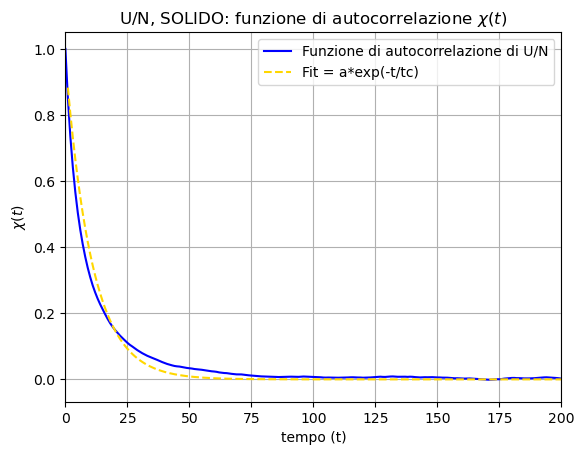

In [6]:
import matplotlib.pyplot as plt

# Dati (energia potenziale misurata ad istanti equispaziati)
filedata = np.loadtxt('2.SOLIDO.epot.out')
S_epot = filedata[:,1]
time = filedata[:,0]

# Calcola l'autocorrelazione e la fitta
autocorr = autocorrelation(S_epot)
par_fit = fit_exp(time, autocorr)

print("Stima tempo di autocorrelazione (tempo in cui la funzione di A.C. si riduce di un fattore e): ", par_fit[1])

y_fit = exp_func(time, par_fit[0], par_fit[1])

# Disegna la funzione di autocorrelazione
plt.plot(range(len(autocorr)), autocorr, color='blue', label='Funzione di autocorrelazione di U/N')
plt.plot(time, y_fit, color='gold', linestyle='dashed', label='Fit = a*exp(-t/tc)')
plt.xlabel('tempo (t)')
plt.ylabel(r'$\chi(t)$')
plt.title(r'U/N, SOLIDO: funzione di autocorrelazione $\chi(t)$')
plt.grid(True)

ax = plt.gca()
ax.set_xlim([0, 200])
    
plt.legend()

# Mostra il grafico
plt.show()

## <span style="color:green"> GRAFICO B) </span> Autocorrelazione energia potenziale per molecola: caso LIQUIDO

Stima tempo di autocorrelazione (tempo in cui la funzione di A.C. si riduce di un fattore e):  17.011651986656496


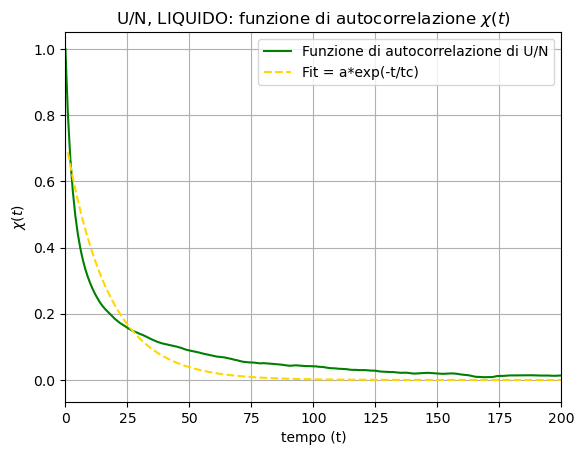

In [7]:
# Dati (energia potenziale misurata ad istanti equispaziati)
filedata = np.loadtxt('2.LIQUIDO.epot.out')
L_epot = filedata[:,1]
time = filedata[:,0]

# Calcola l'autocorrelazione e la fitta
autocorr = autocorrelation(L_epot)
par_fit = fit_exp(time, autocorr)

print("Stima tempo di autocorrelazione (tempo in cui la funzione di A.C. si riduce di un fattore e): ", par_fit[1])

y_fit = exp_func(time, par_fit[0], par_fit[1])

# Disegna la funzione di autocorrelazione
plt.plot(range(len(autocorr)), autocorr, color='green', label='Funzione di autocorrelazione di U/N')
plt.plot(time, y_fit, color='gold', linestyle='dashed', label='Fit = a*exp(-t/tc)')
plt.xlabel('tempo (t)')
plt.ylabel(r'$\chi(t)$')
plt.title(r'U/N, LIQUIDO: funzione di autocorrelazione $\chi(t)$')
plt.grid(True)

ax = plt.gca()
ax.set_xlim([0, 200])
    
plt.legend()

# Mostra il grafico
plt.show()

## <span style="color:purple"> GRAFICO C) </span> Autocorrelazione energia potenziale per molecola: caso GASSOSO

Stima tempo di autocorrelazione (tempo in cui la funzione di A.C. si riduce di un fattore e):  2.4211895935234424


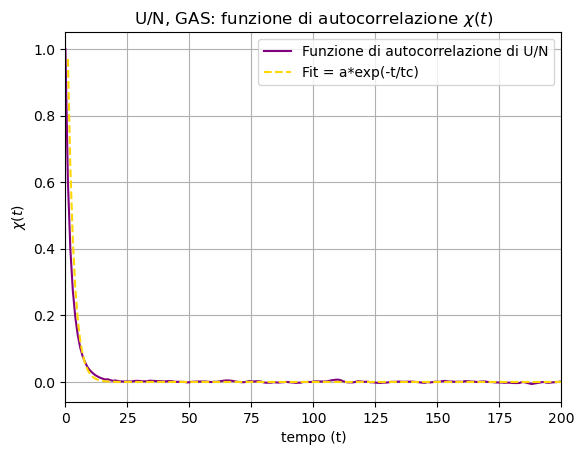

In [8]:
# Dati (energia potenziale misurata ad istanti equispaziati)
filedata = np.loadtxt('2.GAS.epot.out')
G_epot = filedata[:,1]
time = filedata[:,0]

# Calcola l'autocorrelazione e la fitta con l'esponenziale
autocorr = autocorrelation(G_epot)
par_fit = fit_exp(time, autocorr)

print("Stima tempo di autocorrelazione (tempo in cui la funzione di A.C. si riduce di un fattore e): ", par_fit[1])

y_fit = exp_func(time, par_fit[0], par_fit[1])

# Disegna la funzione di autocorrelazione
plt.plot(range(len(autocorr)), autocorr, color='purple', label='Funzione di autocorrelazione di U/N')
plt.plot(time, y_fit, color='gold', linestyle='dashed', label='Fit = a*exp(-t/tc)')
plt.xlabel('tempo (t)')
plt.ylabel(r'$\chi(t)$')
plt.title(r'U/N, GAS: funzione di autocorrelazione $\chi(t)$')
plt.grid(True)

ax = plt.gca()
ax.set_xlim([0, 200])
    
plt.legend()

# Mostra il grafico
plt.show()

## <span style="color:purple"> GRAFICO D) </span> Andamento della incertezza statistica di $\frac{U}{N}$ al variare della dimensione dei blocchi, per le 3 fasi della materia

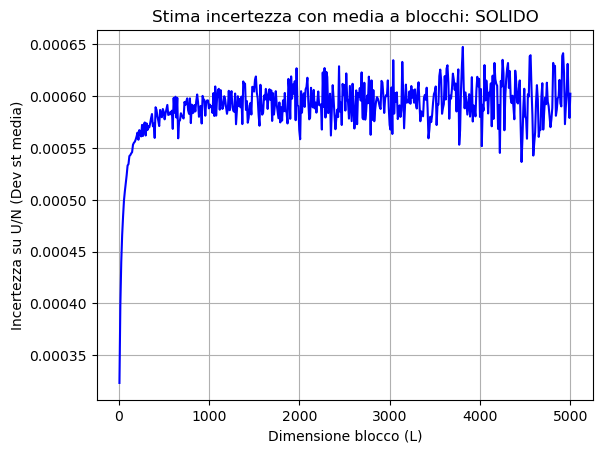

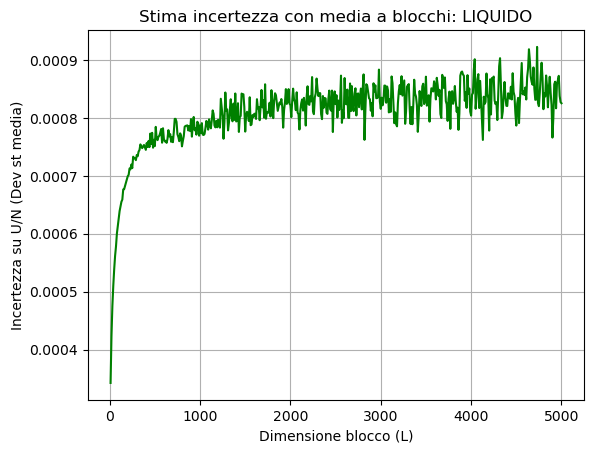

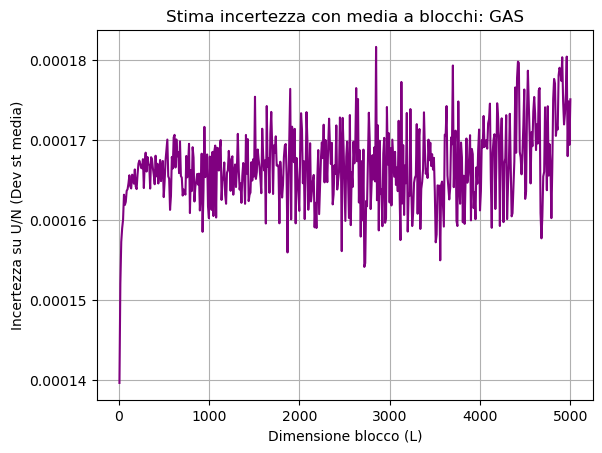

In [9]:
def data_blocking(data, phase, colour):
    nblocks = len(data)

    # Dimensioni dei blocchi (da 10 a 5000 saltando ogni 10 numeri)
    block_sizes = np.arange(10, 5001, 10)

    # Creazione liste per i valori medi e le deviazioni standard per ogni dimensione del blocco
    means = []
    stds = []
    
    # scorro sulle dimensioni dei blocchi
    for block_size in block_sizes:
        nblocks = len(data) // block_size
        block_means = np.zeros(nblocks)    # Azzera i valori medi del blocco
        
        # Calcola i valori medi dei blocchi
        for i in range(nblocks):
            block_means[i] = np.mean(data[i * block_size:(i + 1) * block_size])
            
        # Calcola la media e l'errore finale di tutti i blocchi
        means.append(np.mean(block_means))
        stds.append(np.sqrt(np.mean(block_means ** 2) - np.mean(block_means) ** 2) / np.sqrt(len(block_means) - 1))

    # Crea il grafico
    plt.errorbar(block_sizes, stds, color=f'{colour}')
    plt.xlabel('Dimensione blocco (L)')
    plt.ylabel('Incertezza su U/N (Dev st media)')
    plt.title(f'Stima incertezza con media a blocchi: {phase}')
    plt.grid(True)
    plt.show()


data_blocking(S_epot, 'SOLIDO', 'blue')
data_blocking(L_epot, 'LIQUIDO', 'green')
data_blocking(G_epot, 'GAS', 'purple')